<a href="https://colab.research.google.com/github/PepiMartin28/Regresiones/blob/main/Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Este proyecto esta destinado a practicar regresiones lineales en un dataset con información de laptops para predecir el precio de cada modelo. La idea principal es poder practicar la libreria de Scikit-Learn y diferentes paquetes de esta librería.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Primero vamos a utilizar un dataset con información de modelos de laptops para poder predecir el precio de cada una.

In [2]:
#Importamos el dataset
df = pd.read_csv('/content/drive/MyDrive/Proyectos/Regresion/laptop_price.csv', encoding='Latin-1')

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Vamos a quitar las columnas laptop_ID Product ya que no tiene una gran influencia en el precio.

In [3]:
df= df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros']]

In [71]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Vamos a echar un vistazo como está la cantidad de laptops para cada fabricante.

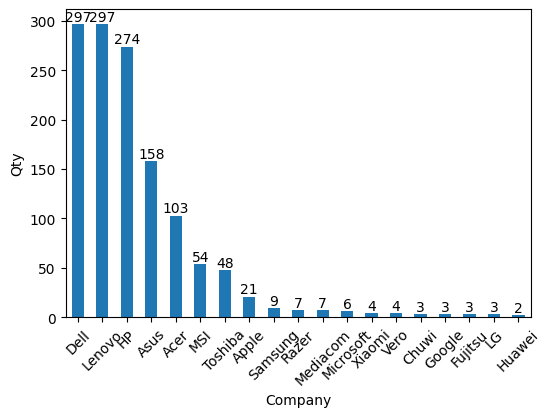

In [ ]:
plt.figure(figsize=(6,4))

ax = df['Company'].value_counts().plot(kind='bar')

ax.set_xlabel('Company')
ax.set_ylabel('Qty')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

En base a la columna Screen vamos a obtener la resolución

In [4]:
df['Resolution'] = df['ScreenResolution'].map(lambda x: x.split()[-1])

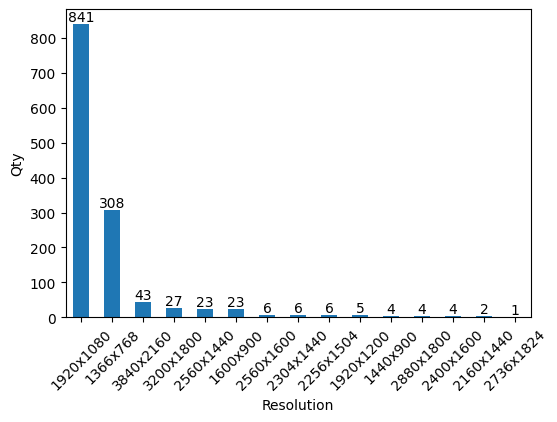

In [5]:
plt.figure(figsize=(6,4))

ax = df['Resolution'].value_counts().plot(kind='bar')

ax.set_xlabel('Resolution')
ax.set_ylabel('Qty')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

A continuación en base a la resolución, se transforma la columna para que solo contenga si tiene resolución HD, Full HD, QHD o 4K.

In [ ]:
df['Resolution'].replace({
    "1920x1080": "Full HD",
    "1920x1200": "Full HD",
    "2560x1440": "QHD",
    "2304x1440": "QHD",
    "2256x1504": "QHD",
    "2160x1440": "QHD",
    "2560x1600": "QHD",
    "2880x1800": "QHD",
    "2400x1600": "QHD",
    "2736x1824": "QHD",
    "3200x1800": "QHD",
    "3840x2160": "4K",
    "1366x768": "HD",
    "1440x900": "HD",
    "1600x900": "HD"}, inplace=True)

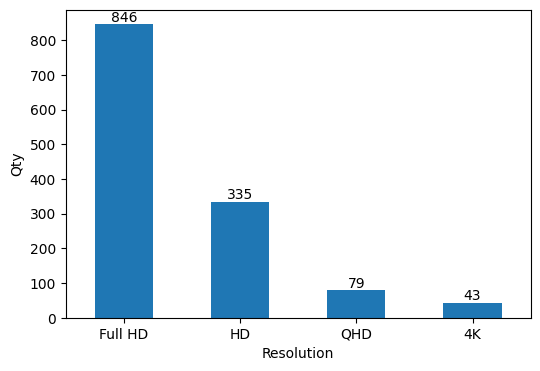

In [ ]:
plt.figure(figsize=(6,4))

ax = df['Resolution'].value_counts().plot(kind='bar')

ax.set_xlabel('Resolution')
ax.set_ylabel('Qty')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

De la columna CPU solo nos vamos a quedar con quien fabrico la CPU y el modelo.

In [6]:
def get_processor(text):
    if text.find('Intel Core')>-1:
        return " ".join(text.split()[:3])
    else:
        if text.split()[0]=="Intel":
            return 'Other Intel Processor'
        else:
            return "AMD Processor"

In [7]:
df['CPU Model'] = df['Cpu'].map(get_processor)

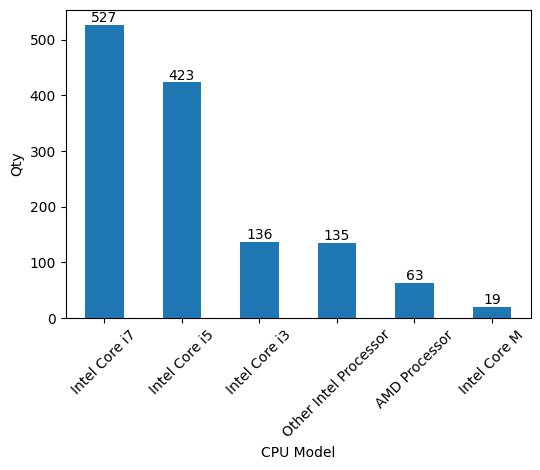

In [8]:
plt.figure(figsize=(6,4))

ax = df['CPU Model'].value_counts().plot(kind='bar')

ax.set_xlabel('CPU Model')
ax.set_ylabel('Qty')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

Además vamos a almacenar en una columna la cantidad de GHz que tiene cada CPU.

In [9]:
df['CPU(GHz)'] = df['Cpu'].map(lambda x: float(x.split()[-1].replace('GHz','')))

La columna RAM la transformamos a int y solo guardamos la cantidad de GB que tiene de RAM cada modelo.

In [10]:
df['RAM(GB)'] = df['Ram'].map(lambda x: int(x[:-2]))

Para la columna Storage vamos a crear 3 columnas la cual alberga un 1 si el modelo tiene esti tipo de storage y 0 si no tiene este tipo de storage.

In [11]:
df['SSD'] = df['Memory'].map(lambda x: 1 if x.find('SSD')>0 else 0)

In [12]:
df['HDD'] = df['Memory'].map(lambda x: 1 if x.find('HDD')>0 else 0)

In [13]:
df['Flash Storage'] = df['Memory'].map(lambda x: 1 if x.find('Flash Storage')>0 else 0)

Para la columna GPU vamos a realizar el mismo procedimiento que para la columna CPU.

In [14]:
def get_gpu(text):
    if text.find('Intel')>-1:
      return " ".join(text.split()[:3])
    if text.find('Nvidia')>-1:
      return " ".join(text.split()[:2])
    if text.find('AMD')>-1:
      return " ".join(text.split()[:2])

In [15]:
df['GPU Model'] = df['Gpu'].map(get_gpu)

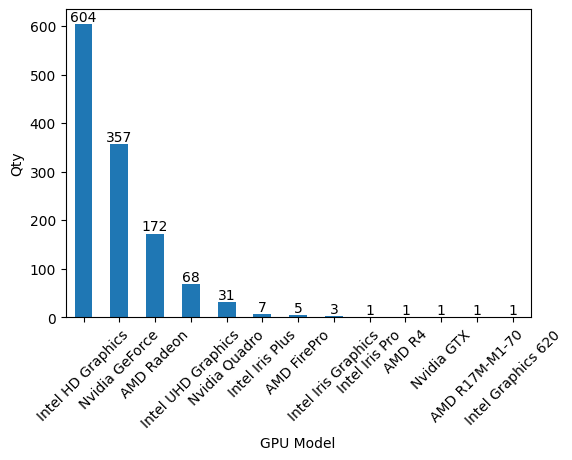

In [ ]:
plt.figure(figsize=(6,4))

ax = df['GPU Model'].value_counts().plot(kind='bar')

ax.set_xlabel('GPU Model')
ax.set_ylabel('Qty')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

El peso lo vamos a transformar en un float.

In [16]:
df['Weight'] = df['Weight'].map(lambda x: float(x.replace('kg', '')))

Asi quedaría finalmente el DataFrame con todos los cambios.

In [18]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution,CPU Model,CPU(GHz),RAM(GB),SSD,HDD,Flash Storage,GPU Model
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,Intel Core i5,2.3,8,1,0,0,Intel Iris Plus
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,Intel Core i5,1.8,8,0,0,1,Intel HD Graphics
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,Intel Core i5,2.5,8,1,0,0,Intel HD Graphics
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,Intel Core i7,2.7,16,1,0,0,AMD Radeon
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,Intel Core i5,3.1,8,1,0,0,Intel Iris Plus


In [17]:
print(f'Número de registros: {len(df)}')

Número de registros: 1303


Vamos a generar una copia del DataFrame final.

In [19]:
df_final = df.copy()

Dado que en ciertas columnas hay hay valores que aparecen menos de 10 veces los vamos a quitar.

In [20]:
df_final.drop(index=df_final[df_final['Gpu'].str.contains('ARM')].index, inplace=True)

In [21]:
fabricantes_frecuentes = df_final['Company'].value_counts() > 10
fabricantes_a_eliminar = fabricantes_frecuentes[~fabricantes_frecuentes].index.tolist()
df_final.drop(index=df_final[df_final['Company'].isin(fabricantes_a_eliminar)].index, inplace=True)

In [22]:
gpu_frecuentes = df_final['GPU Model'].value_counts() > 10
gpu_a_eliminar = gpu_frecuentes[~gpu_frecuentes].index.tolist()
df_final.drop(index=df_final[df_final['GPU Model'].isin(gpu_a_eliminar)].index, inplace=True)

In [23]:
resolution_frecuentes = df_final['GPU Model'].value_counts() > 10
resolution_a_eliminar = resolution_frecuentes[~resolution_frecuentes].index.tolist()
df_final.drop(index=df_final[df_final['GPU Model'].isin(resolution_a_eliminar)].index, inplace=True)

In [24]:
print(f'Número de registros: {len(df_final)}')

Número de registros: 1232


A continuación vamos a separar en features y labels. Features son las columnas que consideramos importante para predecir el precio del modelo. Y label es la columna a predecir.

In [25]:
features = df_final[['Inches',  'RAM(GB)', 'SSD', 'HDD', 'Flash Storage']]

In [26]:
labels = df_final['Price_euros']

Las siguientes variables las vamos a transformar en dummies para facilitar la tarea del modelo predictor.

In [27]:
cat_vars = ['Company', 'TypeName', 'Resolution', 'GPU Model', 'CPU Model']

In [28]:
for column in cat_vars:
  dummy = pd.get_dummies(df_final[column], prefix=column.replace(' ', '_'), prefix_sep=':', drop_first=True)
  aux = pd.concat([features, dummy], axis=1)
  features = aux

El dataframe de features resultante es el siguiente.

In [29]:
features.head()

,Inches,RAM(GB),SSD,HDD,Flash Storage,Company:Apple,Company:Asus,Company:Dell,Company:HP,Company:Lenovo,...,Resolution:3840x2160,GPU_Model:Intel HD Graphics,GPU_Model:Intel UHD Graphics,GPU_Model:Nvidia GeForce,GPU_Model:Nvidia Quadro,CPU_Model:Intel Core M,CPU_Model:Intel Core i3,CPU_Model:Intel Core i5,CPU_Model:Intel Core i7,CPU_Model:Other Intel Processor
1,13.3,8,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,15.6,8,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,15.4,16,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,15.6,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,13.3,8,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [30]:
print(f'Número de features: {len(features.columns)}')

Número de features: 35


Importamos las librerias necesarias para trabajar con el modelo predictor.

In [31]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.utils.fixes import loguniform
import scipy.stats as stats

Creamos un Dataframe para poder comparar los resultados de los distintos modelos regresores.

In [32]:
results_df = pd.DataFrame(columns=['model_name', 'mae', 'mse', 'rmse'])

Creamos una funcion para realizar de una manera más rapida las regresiones y no repetir codigo.

In [33]:
def regresor(model, features_train, features_test, labels_train,  labels_test):
  model.fit(features_train, labels_train)
  y_pred = model.predict(features_test)
  mse = mean_squared_error(labels_test, y_pred)
  rmse = np.sqrt(mean_squared_error(labels_test, y_pred))
  mae = mean_absolute_error(labels_test, y_pred)
  return mse, rmse, mae

Dividimos las features y los labels en entrenamiento y testeo.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25 ,random_state=0)

##1° Pasada

Para medir los errores de cada modelo utilizamos la metrica de error medio absoluto, error medio cuadrado y la raiz del error medio cuadrado.

El primero modelo que vamos a utilizar es el LinearRegresion.

In [35]:
model = LinearRegression()
model_name = 'linear_regresion'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
results_df = results_df.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

Seguimos con otra variante del modelo LinearRegresion que reduce la complejidad del modelo penalizando el tamaño de los estimadores teniendo en cuenta un valor de penalización.

In [36]:
model = Ridge()
model_name = 'ridge'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
results_df = results_df.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

A continuación seguimos con una variante del modelo LinearRegression el cual a diferencia del modelo Ridge, funciona como un selector de variables debido a que ciertos parametros pueden tomar un valor de cero teniendo en cuenta el parametros de penalización.

In [37]:
model = Lasso()
model_name = 'lasso'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
results_df = results_df.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

Por ultimo vamos a utilizar un modelo llamado ElasticNet que es una mezcla entre los modelos Lasso y Ridge, que dependiendo del valor del parametro de penalización puede trabajar como un Lasso o como un Ridge.

In [38]:
model = ElasticNet()
model_name = 'enet'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
results_df = results_df.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

Ahora vamos a agregar un paso más al proceso. En este caso vamos a buscar valores optimos de los paramtros en un ElasticNet, esto lo vamos a llevar a cabo utilizando un metodo de busqueda de parametros llamado Randomized Search.

In [39]:
model_enet = ElasticNet()

parametros={'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 1e0)}
n_iteraciones = 15

random_search = RandomizedSearchCV(estimator = model_enet, n_iter = n_iteraciones, param_distributions = parametros,
                                   cv = 20, scoring ='neg_mean_squared_error', random_state = 0 )
random_search.fit(X_train, y_train)

model_name = 'enet_randomizedSearch'

y_pred = random_search.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

results_df = results_df.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

Ahora vamos a primero buscar cuales son las mejores features para ver si obtiene mejores features que utilizando todas.

In [40]:
#Vamos a utilizar 20 features
model = ElasticNet()
rfe = RFE(model, n_features_to_select=25)
rfe.fit(features, labels)

RFE(estimator=ElasticNet(), n_features_to_select=25)

Las features que mejor optimizan el modelos son las siguientes:

In [41]:
cols=rfe.feature_names_in_[rfe.support_]
cols

array(['Inches', 'RAM(GB)', 'SSD', 'HDD', 'Flash Storage',
       'Company:Apple', 'Company:Asus', 'Company:HP', 'Company:MSI',
       'Company:Toshiba', 'TypeName:Gaming', 'TypeName:Netbook',
       'TypeName:Notebook', 'TypeName:Ultrabook', 'TypeName:Workstation',
       'Resolution:1920x1080', 'Resolution:2560x1440',
       'Resolution:3840x2160', 'GPU_Model:Intel HD Graphics',
       'GPU_Model:Nvidia Quadro', 'CPU_Model:Intel Core M',
       'CPU_Model:Intel Core i3', 'CPU_Model:Intel Core i5',
       'CPU_Model:Intel Core i7', 'CPU_Model:Other Intel Processor'],
      dtype=object)

In [42]:
df_features = features[cols]
df_labels = labels
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.25 ,random_state=0)

In [43]:
model_name = 'enet_features_reducidas'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
results_df = results_df.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

Una vez finalizado el proceso de trabajar con todos los modelos veamos los resutlados.

In [44]:
results_df

,model_name,mae,mse,rmse
0,linear_regresion,228.289477,95455.489627,308.958718
1,ridge,227.347504,94811.050373,307.914031
2,lasso,227.680546,95491.356488,309.016758
3,enet,286.413044,149031.746649,386.046301
4,enet_randomizedSearch,227.444297,94900.113729,308.058621
5,enet_features_reducidas,286.259419,148877.898439,385.846988


Como se puede apreciar podemos comentar lo siguiente:

* Cuando quitamos features al modelo, el error crece.
* Cuando tenemos todas las features, el modelo que más error tuvo fue el Elastic Net. Y el resto de los modelos tuvo un error parecido.

## 2° Pasada

A continuación vamos a probar utilizar todos los registros disponibles.
Vamos a repetir todo el proceso que hicimos anteriormente.

In [45]:
features = df[['Inches',  'RAM(GB)', 'SSD', 'HDD', 'Flash Storage']]

In [46]:
labels = df['Price_euros']

In [47]:
cat_vars = ['Company', 'TypeName', 'Resolution', 'GPU Model', 'CPU Model']

In [48]:
for column in cat_vars:
  dummy = pd.get_dummies(df[column], prefix=column.replace(' ', '_'), prefix_sep=':', drop_first=True)
  aux = pd.concat([features, dummy], axis=1)
  features = aux

In [49]:
features.head()

,Inches,RAM(GB),SSD,HDD,Flash Storage,Company:Apple,Company:Asus,Company:Chuwi,Company:Dell,Company:Fujitsu,...,GPU_Model:Intel Iris Pro,GPU_Model:Intel UHD Graphics,GPU_Model:Nvidia GTX,GPU_Model:Nvidia GeForce,GPU_Model:Nvidia Quadro,CPU_Model:Intel Core M,CPU_Model:Intel Core i3,CPU_Model:Intel Core i5,CPU_Model:Intel Core i7,CPU_Model:Other Intel Processor
0,13.3,8,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,13.3,8,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15.6,8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,15.4,16,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,13.3,8,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
print(f'Número de features: {len(features.columns)}')

Número de features: 59


In [93]:
df_results = pd.DataFrame(columns=['model_name', 'mae', 'mse', 'rmse'])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25 ,random_state=0)

In [94]:
model = LinearRegression()
model_name = 'linear_regresion'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
df_results = df_results.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

In [95]:
model = Ridge()
model_name = 'ridge'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
df_results = df_results.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

In [96]:
model = Lasso()
model_name = 'lasso'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
df_results = df_results.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

In [97]:
model = ElasticNet()
model_name = 'enet'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
df_results = df_results.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

In [98]:
model_enet = ElasticNet()

parametros={'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 1e0)}
n_iteraciones = 15

random_search = RandomizedSearchCV(estimator = model_enet, n_iter = n_iteraciones, param_distributions = parametros,
                                   cv = 20, scoring ='neg_mean_squared_error', random_state = 0 )
random_search.fit(X_train, y_train)

model_name = 'enet_randomizedSearch'

y_pred = random_search.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

df_results = df_results.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

In [99]:
#Vamos a utilizar 35 features
model = ElasticNet()
rfe = RFE(model, n_features_to_select=35)
rfe.fit(features, labels)

RFE(estimator=ElasticNet(), n_features_to_select=35)

In [100]:
cols=rfe.feature_names_in_[rfe.support_]
cols

array(['Inches', 'RAM(GB)', 'SSD', 'HDD', 'Flash Storage',
       'Company:Apple', 'Company:Asus', 'Company:HP', 'Company:MSI',
       'Company:Mediacom', 'Company:Microsoft', 'Company:Razer',
       'Company:Toshiba', 'TypeName:Gaming', 'TypeName:Netbook',
       'TypeName:Notebook', 'TypeName:Ultrabook', 'TypeName:Workstation',
       'Resolution:1600x900', 'Resolution:1920x1080',
       'Resolution:2256x1504', 'Resolution:2560x1440',
       'Resolution:2560x1600', 'Resolution:2880x1800',
       'Resolution:3840x2160', 'GPU_Model:AMD Radeon',
       'GPU_Model:Intel Iris Plus', 'GPU_Model:Intel UHD Graphics',
       'GPU_Model:Nvidia GeForce', 'GPU_Model:Nvidia Quadro',
       'CPU_Model:Intel Core M', 'CPU_Model:Intel Core i3',
       'CPU_Model:Intel Core i5', 'CPU_Model:Intel Core i7',
       'CPU_Model:Other Intel Processor'], dtype=object)

In [101]:
df_features = features[cols]
df_labels = labels
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.25 ,random_state=0)

In [102]:
model_name = 'enet_features_reducidas'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
df_results = df_results.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

In [103]:
df_results

,model_name,mae,mse,rmse
0,linear_regresion,254.748239,129532.458067,359.906180
1,ridge,255.764007,132256.679363,363.671114
2,lasso,257.765904,134584.551572,366.857672
3,enet,306.007066,199344.629670,446.480268
4,enet_randomizedSearch,256.630221,133802.829545,365.790691
5,enet_features_reducidas,305.997298,199087.952307,446.192730


Como se puede ver, al aumentar la cantidad de registros, aumentan la cantidad de features debido a que se agregan más columnas dummy. Al tener tantas columnas ocasiona que aumente el error en cada modelo.

## 3° Pasada

Para finalizar este notebook vamos a utilizar otros tipos de modelos de regresión para comparar resultados. En este caso vamos a utilizar las feautres que tuvimos en la primera pasada de los modelos.

In [104]:
features = df_final[['Inches',  'RAM(GB)', 'SSD', 'HDD', 'Flash Storage']]

In [105]:
labels = df_final['Price_euros']

In [106]:
cat_vars = ['Company', 'TypeName', 'Resolution', 'GPU Model', 'CPU Model']

In [107]:
for column in cat_vars:
  dummy = pd.get_dummies(df_final[column], prefix=column.replace(' ', '_'), prefix_sep=':', drop_first=True)
  aux = pd.concat([features, dummy], axis=1)
  features = aux

In [116]:
regresores_results = pd.DataFrame(columns=['model_name', 'mae', 'mse', 'rmse'])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25 ,random_state=0)

El primer modelo que vamos a probar es el Decision Tree.

In [117]:
model = DecisionTreeRegressor()
model_name = 'decision_tree'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
regresores_results = regresores_results.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

Luego usamos el Random Forest, el cual es un modelo ensamble que utiliza como base los Decision Trees.

In [118]:
model = RandomForestRegressor()
model_name = 'random_forest'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
regresores_results = regresores_results.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

Seguimos con el KNeighbors, el cual funciona utilizando centroides y aproximando valores por vecinos.

In [119]:
model = KNeighborsRegressor()
model_name = 'kneighbors'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
regresores_results = regresores_results.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

Ahora pasamos al SGD. Este es una variante de los modelos lineales pero utiliza el descenso stocastico del gradiente en la función de perdida.

In [120]:
model = SGDRegressor()
model_name = 'sgd'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
regresores_results = regresores_results.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

Terminamos con 2 modelos ensambles, el primero llamado Ada Boost, el cual utiliza el modelo Decision Tree.

In [121]:
model = AdaBoostRegressor()
model_name = 'ada'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
regresores_results = regresores_results.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

Por ultimo vamos a utilizar el modelo Gradient Boosting que es otro modelo ensamble. Este al igual que el modelo Ada Boost utiliza los Decision Trees como base.

In [122]:
model = GradientBoostingRegressor()
model_name = 'gradient_boosting'
mse, rmse, mae = regresor(model, X_train, X_test, y_train, y_test)
regresores_results = regresores_results.append({'model_name': model_name, 'mae': mae, 'rmse': rmse, 'mse': mse}, ignore_index=True)

A continuación vemos los resultados.

In [123]:
regresores_results

,model_name,mae,mse,rmse
0,decision_tree,240.446463,143171.773019,378.380461
1,random_forest,210.738241,102744.557482,320.537919
2,kneighbors,243.376039,128695.895967,358.742102
3,sgd,235.443760,105985.896148,325.554751
4,ada,276.874755,120989.672448,347.835697
5,gradient_boosting,211.377413,92357.442736,303.903673


Como se observa, solamente los modelos Random Forest y Gradient Boosting han mejorado los resultados obtenidos con los modelos lineales de la primera pasada.